In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from tqdm import tqdm

import hrv_analysis as hrv
import optical_gating_analysis as OG

import j_py_sad_correlation as jps

import tifffile as tf
import glob

In [10]:
data = OG.SequenceManager.load_tif(r"C:\Users\Karlin\Documents\PhD\Data\June 2024 imaging\Day1 variability healthy 30mins\first fish\2024-06-19 14.56.40 vid\Allied Vision Technologies GS650 0001f61c\*tif")

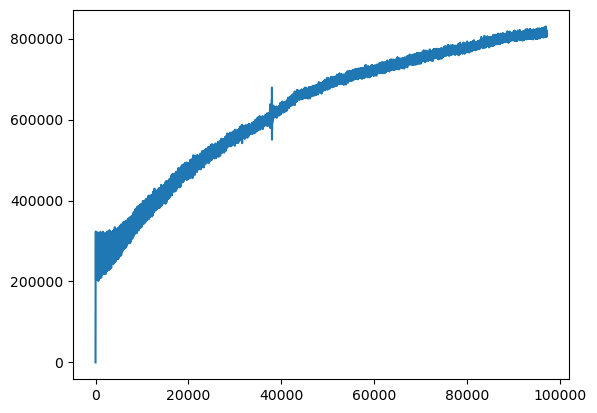

In [11]:
sads = jps.sad_with_references(data[0], data)

plt.plot(sads)
plt.show()

97000


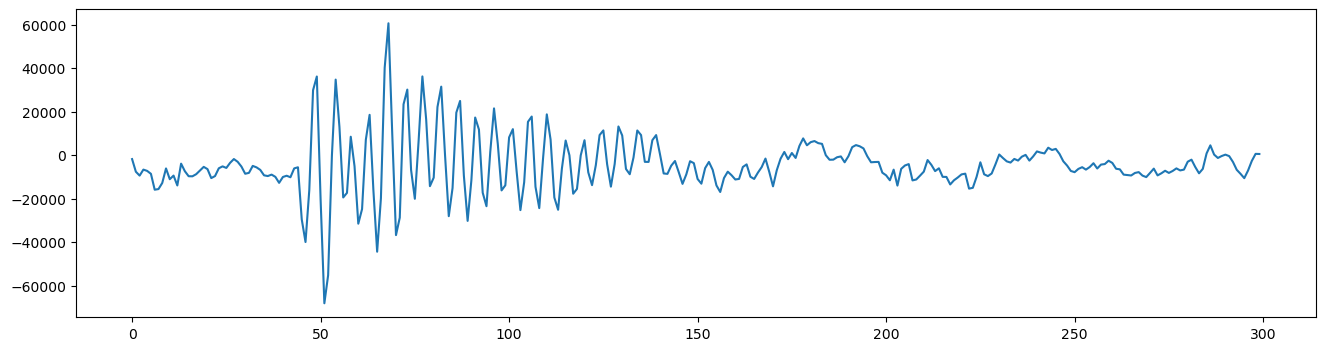

In [36]:
# Perform trend removal
# First do a quadratic fit
x = np.arange(len(sads))
fit = np.polyfit(x, sads, 2)
trend = np.polyval(fit, x)
sads -= trend

print(len(sads))

plt.figure(figsize = (16,4))
plt.plot(-sads[37900:38200])
plt.show()

100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


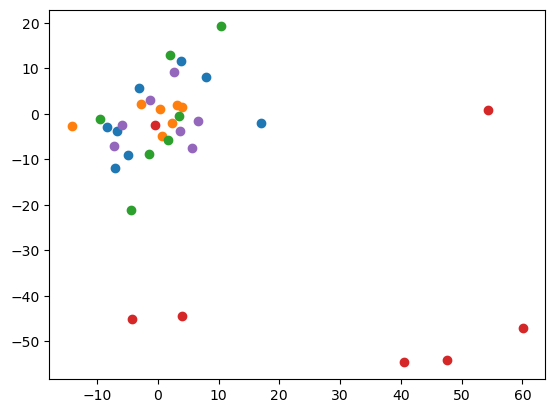

In [4]:
files_src = r"C:\Users\Karlin\Documents\PhD\Data\June 2024 imaging\Day1 variability healthy 30mins\first fish\2024-06-19 14.56.40 vid\Allied Vision Technologies GS650 0001f61c\*tif"
files = glob.glob(files_src)
for file in tqdm(files[0:5]):
    oog = OG.BasicOpticalGating()
    oog.settings["show_status"] = False
    oog.settings["progress_bars"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    data = tf.imread(file)
    sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[54-27], data)
    sad_curve -= np.min(sad_curve)
    sad_curve /= np.max(sad_curve)
    hrs1 = hrv.get_hr_from_sad(sad_curve, 0.7, distance = 30, prominence = 0.04, plot_sad = False)
    sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[54+27], data)
    sad_curve -= np.min(sad_curve)
    sad_curve /= np.max(sad_curve)
    hrs2 = hrv.get_hr_from_sad(sad_curve, 0.7, distance = 30, prominence = 0.04, plot_sad = False)

    hrs1 = hrs1[0:np.min([len(hrs1), len(hrs2)])]
    hrs2 = hrs2[0:len(hrs1)]

    c = np.empty((hrs1.size + hrs2.size,), dtype=hrs1.dtype)
    c[0::2] = hrs1
    c[1::2] = hrs2
    plt.scatter(np.diff(c)[:-1:2], np.diff(c)[1::2])

In [5]:
oog = OG.BasicOpticalGating().default()
oog.run()
print(oog.sequence_manager.reference_period)

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting reference sequence 

TypeError: Unable to parse input parameters!

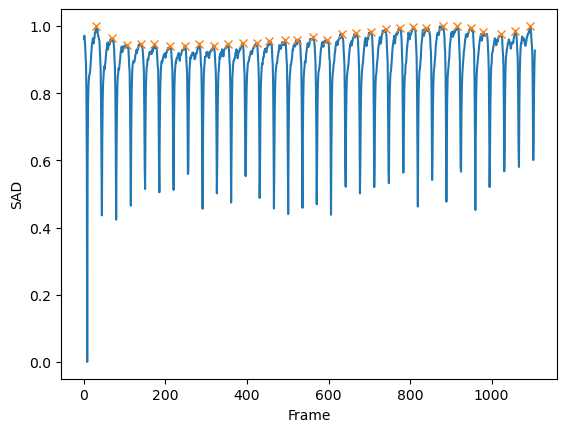

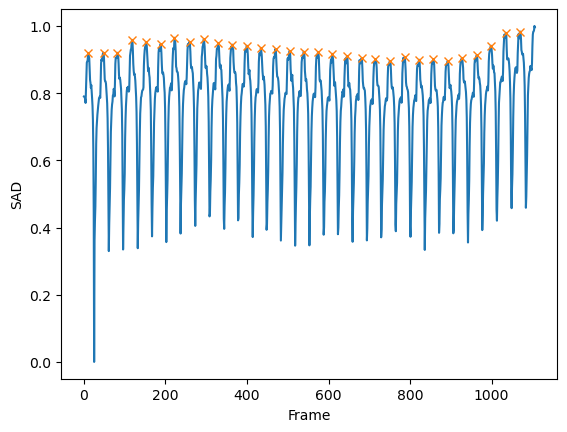

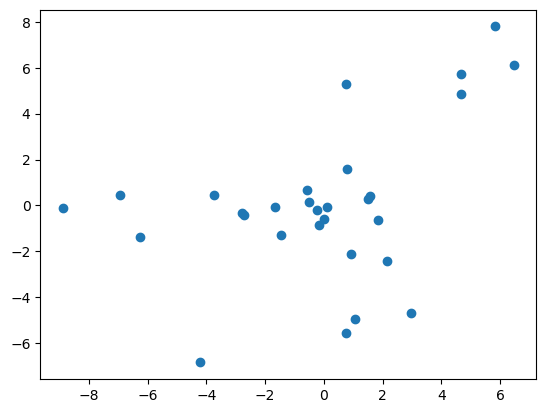

In [ ]:
data = tf.imread(r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif")
sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[0], data)
sad_curve -= np.min(sad_curve)
sad_curve /= np.max(sad_curve)
hrs1 = hrv.get_hr_from_sad(sad_curve, 0.8)
sad_curve = jps.sad_with_references(oog.sequence_manager.reference_sequence[17], data)
sad_curve -= np.min(sad_curve)
sad_curve /= np.max(sad_curve)
hrs2 = hrv.get_hr_from_sad(sad_curve, 0.8)

c = np.empty((hrs1.size + hrs2.size,), dtype=hrs1.dtype)
c[0::2] = hrs1
c[1::2] = hrs2
plt.scatter(np.diff(c)[:-1:2], np.diff(c)[1::2])
plt.show()